In [186]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [187]:
#importing and reading the csv file
df = pd.read_csv("D:/My Work/Sem-3/DAI-101/Final assignment2/tips (data for regression problem).csv")

EDA

In [188]:
#gives the top 5 rows of the csv file data
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [189]:
#Printing the data types of the columns 
print(df.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [190]:
# Converting all categorical variables into dummy variables
df_new = pd.get_dummies(df)

In [191]:
df_new.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


In [192]:
print(df_new.dtypes)

total_bill     float64
tip            float64
size             int64
sex_Female        bool
sex_Male          bool
smoker_No         bool
smoker_Yes        bool
day_Fri           bool
day_Sat           bool
day_Sun           bool
day_Thur          bool
time_Dinner       bool
time_Lunch        bool
dtype: object


In [193]:
# Spliting the data into features (x) and target variable (y)
x = df_new.drop("tip", axis = 1)
y = df_new["tip"]

# Spliting the data into training(20% of data) and testing sets(80%of data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Applying Linear Regression

In [194]:
#Initialising the Linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [195]:
# Predictions
y_pred_linear = linear_reg.predict(x_test)

In [196]:
# Evaluating the results
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

mae = mean_absolute_error(y_test, y_pred_linear)
max_value = max(y_test)  
accuracy = 100 - (mae / max_value) * 100

print('Linear Regression MAE:', mae)
print('Linear Regression Accuracy (based on MAE):', accuracy)

Linear Regression R2: 0.5545031052534934
Linear Regression MAE: 0.7080218832979825
Linear Regression Accuracy (based on MAE): 92.13309018557797


The results show that the model has moderate explanatory power (R² = 0.5545).
Prediction errors (MAE) are relatively small compared to the data range. Thus it indicates a reasonable practical accuracy.

# Ridge Regression

In [197]:
#Initialising the Ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)

Ridge()

In [198]:
# Predictions
y_pred_ridge = ridge_reg.predict(x_test)

In [199]:
# Evaluating the results
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

mae = mean_absolute_error(y_test, y_pred_ridge)
max_value = max(y_test) 
accuracy = 100 - (mae / max_value) * 100

print('Ridge Regression MAE:', mae)
print('Ridge Regression accuracy according to MAE:', accuracy)


Ridge Regression R2: 0.564813150838856
Ridge Regression MAE: 0.6889329422715513
Ridge Regression accuracy according to MAE: 92.34518953031609


The R2 value shows that the model has moderate explanatory power but a little higher than the linear regression model. A low MAE value suggests that the predictions are quite accurate.

# Lasso Regression

In [200]:
#Initialising the Lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1)

In [201]:
# Predictions
y_pred_lasso = lasso_reg.predict(x_test)

In [202]:
# Evaluating the results
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

mae = mean_absolute_error(y_test, y_pred_lasso)
max_value = max(y_test)  
accuracy = 100 - (mae / max_value) * 100

print('Lasso Regression MAE:', mae)
print('Lasso Regression Accuracy (based on MAE):', accuracy)


Lasso Regression R2: 0.5898286701221247
Lasso Regression MAE: 0.6525144930812424
Lasso Regression Accuracy (based on MAE): 92.74983896576397


The R2 value shows that the model has moderate explanatory power but a little higher than the previous models. A low MAE value suggests that the predictions are quite accurate.

# Decision Tree Regression

In [203]:
#Initialising the Decision Tree regression model
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [204]:
# Predictions
y_pred_tree = tree_reg.predict(x_test)

In [205]:
# Evaluating the results
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

Decision Tree R2: -0.09484264934124487


The negative R2 value suggests that the model connot explain the data at all. Thus Decision tree regression cannot be used to draw any conclusion on the data pattern.

# Random Forest Regression

In [206]:
#Initialising the Random Forest regression model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [207]:
# Predictions
y_pred_forest = forest_reg.predict(x_test)

In [208]:
# Evaluating the results
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

mae_forest = mean_absolute_error(y_test, y_pred_forest)
print('Random Forest MAE:', mae_forest)

max_value = max(y_test)  
accuracy_forest = 100 - (mae_forest / max_value) * 100

print('Random Forest Accuracy (based on MAE):', accuracy_forest)

Random Forest R2: 0.6292411527250314
Random Forest MAE: 0.6964469387755103
Random Forest Accuracy (based on MAE): 92.26170068027211


This regression model has a better R2 value than the other model.


# Support Vector Regression

In [209]:
# Feature Scaling for SVR
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.transform(x_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [210]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_scaled, y_train_scaled)

SVR()

In [211]:
# Predictions
y_pred_svr = svr_reg.predict(x_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

In [212]:
# Evaluating the results
print('SVR R2:', r2_score(y_test, y_pred_svr))

mae_svr = mean_absolute_error(y_test, y_pred_svr)
print('SVR MAE:', mae_svr)

max_value = max(y_test)
accuracy_svr = 100 - (mae_svr / max_value) * 100

print('SVR Accuracy (based on MAE):', accuracy_svr)

SVR R2: 0.5145816625537214
SVR MAE: 0.7554573301187217
SVR Accuracy (based on MAE): 91.60602966534753


# K-Nearest Neighbour Regression

In [213]:
#Initialising the KNN regression model
knn_reg = KNeighborsRegressor(n_neighbors=25)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [214]:
# Predictions
y_pred_knn = knn_reg.predict(x_test)

In [215]:
# Evaluating the results
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

mae_knn = mean_absolute_error(y_test, y_pred_knn)
print('KNN Regression MAE:', mae_knn)

max_value = max(y_test)
accuracy_knn = 100 - (mae_knn / max_value) * 100
print('KNN Regression Accuracy (based on MAE):', accuracy_knn)

KNN Regression R2: 0.5248321116985247
KNN Regression MAE: 0.6576897959183673
KNN Regression Accuracy (based on MAE): 92.69233560090703


CONCLUSION:

Based on the results, we can conclude that the Total bill and size are the main factors which affect the tip amounts. People are usually give a tip amount which is according to their total bill amounts.

Also, in order to improve the customer service, the restraunt should introduce more friendly and professional staff and introduce more variety in dishes so as to attract more customers. Family discounts should be offered more frequently so that the group size can be increased which significantly impacts the tip amount.

The best model to analyse the dataset is the Lasso regression model since it gives the highest accuracy among all the other regression models.

# #QUESTION-2

Various types of plots are drawn so as to better visualise the data.

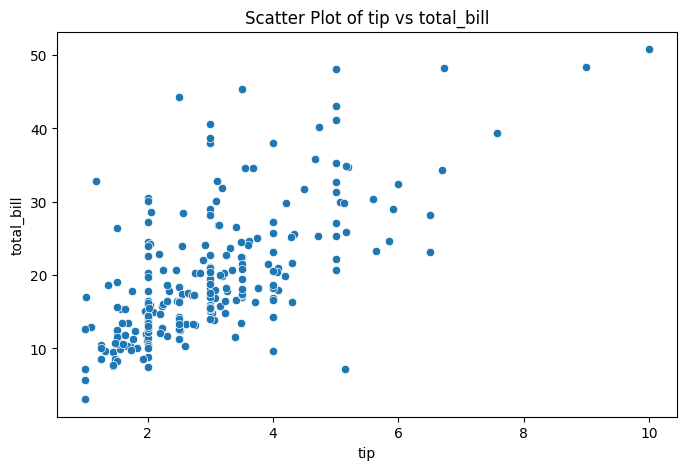

In [216]:
# 1. Scatter plot of two columns (replace 'x_column' and 'y_column' with actual column names)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tip', y='total_bill', data=df_new)
plt.title('Scatter Plot of tip vs total_bill')
plt.xlabel('tip')
plt.ylabel('total_bill')
plt.show()


The scatter plot shows the variation of Total bill with Tip. By the graph we can conclude that outliers are also present in the whole dataset. Also, the data is pretty scattered.

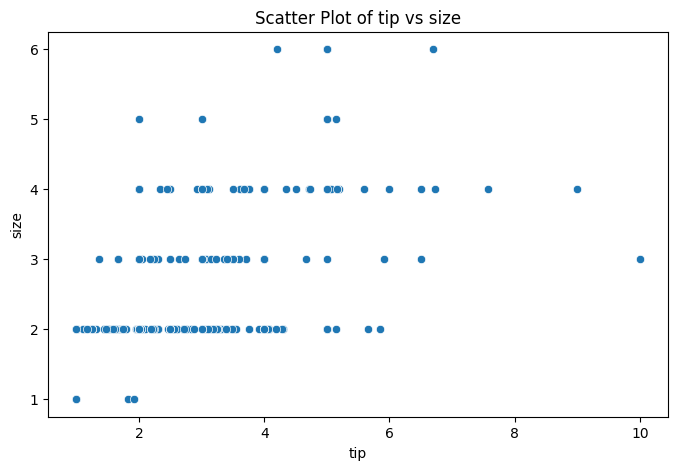

In [217]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tip', y='size', data=df_new)
plt.title('Scatter Plot of tip vs size')
plt.xlabel('tip')
plt.ylabel('size')
plt.show()


The scatter plot above shows the varation of tip with the size i.e the number of members eating at the restraunt. By looking at the plot we can conclude that the tip is mostly given by the people who come in groups of 2, 3 and 4. The number of outliers are very less ie, people who give really large amount of tip is very less.

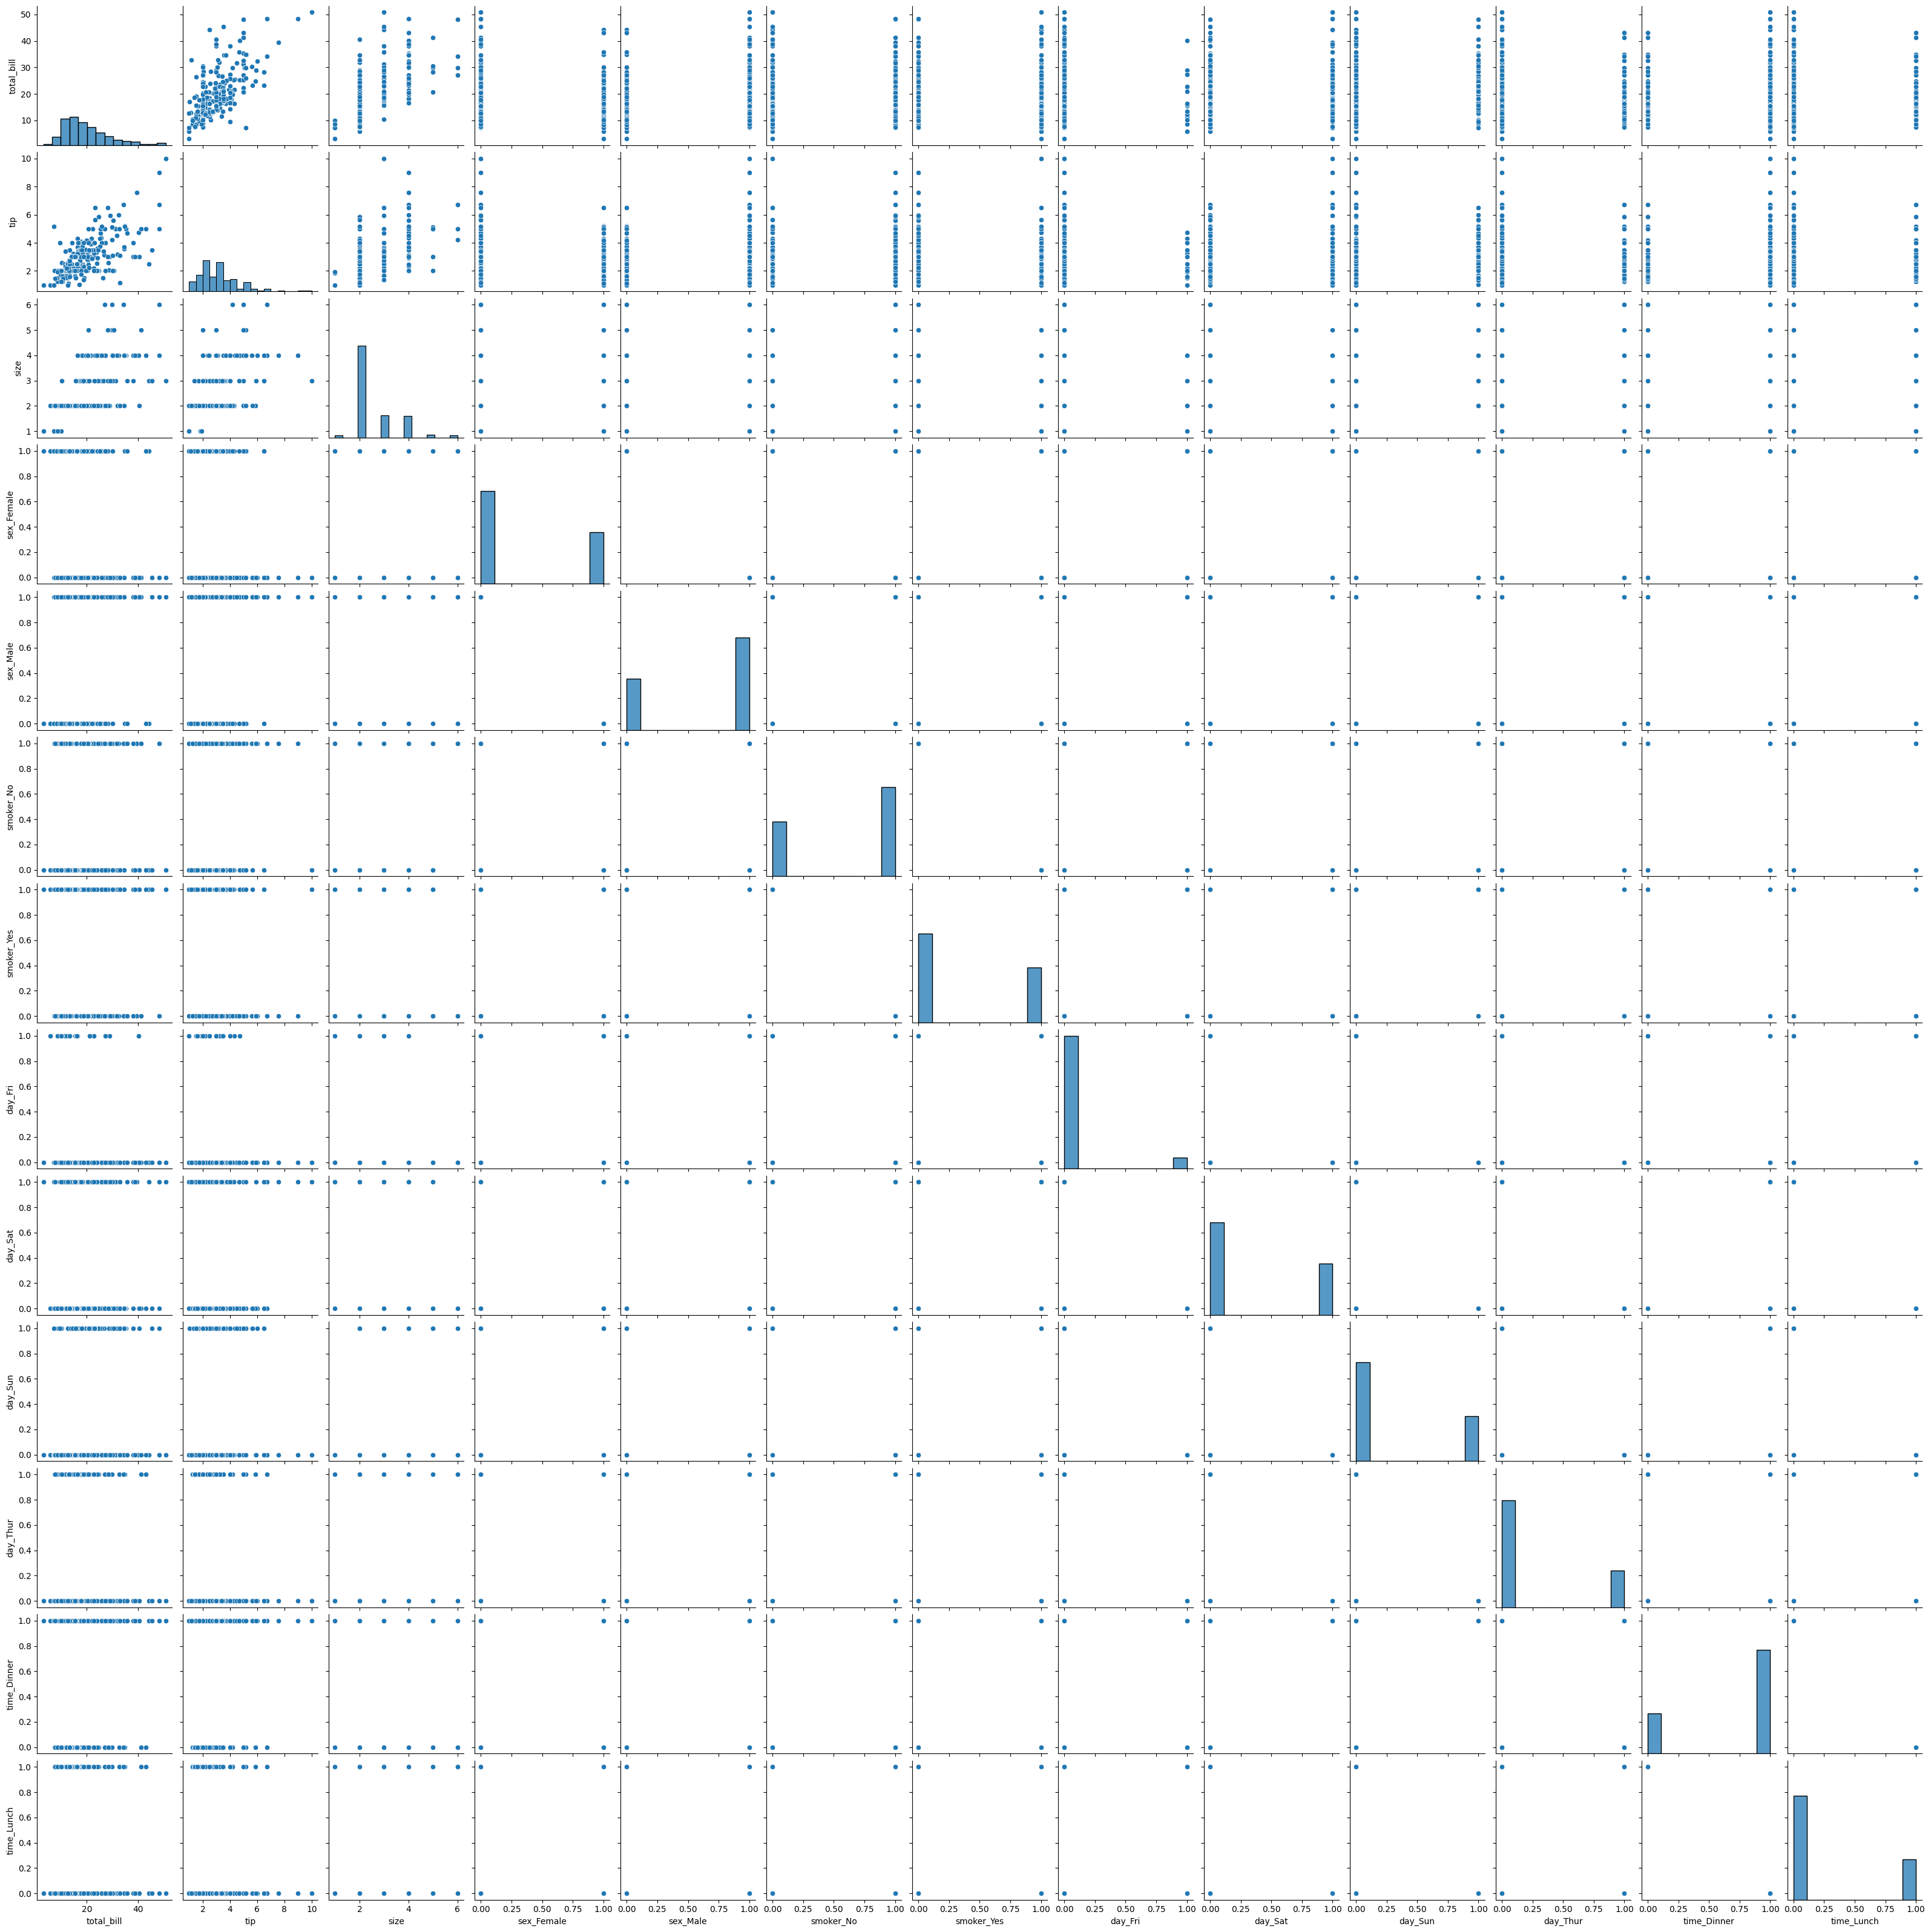

In [218]:
sns.pairplot(df_new)
plt.show()

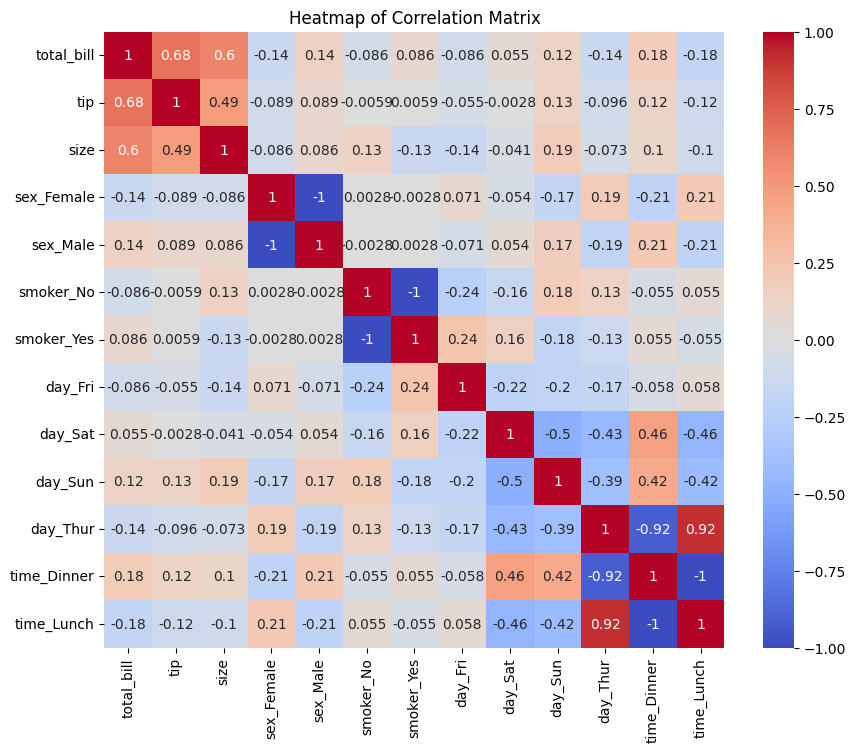

In [219]:
correlation_matrix = df_new.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Above is the heat map of the whole dataset which shows the inter relationship between various columns of the dataset. 

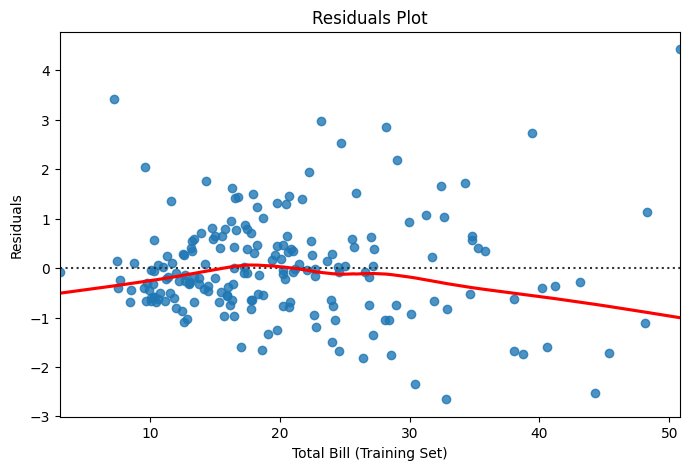

In [220]:
# Residuals plot for the 'total_bill' vs 'tip' model
predictions = linear_reg.predict(x_train)
residuals = y_train - predictions

plt.figure(figsize=(8, 5))
sns.residplot(x=x_train['total_bill'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Total Bill (Training Set)')
plt.ylabel('Residuals')
plt.show()


Since the plot is around zero,it shows a linear relationship between total bill and tip. It also confirms that there are no significant outliers.


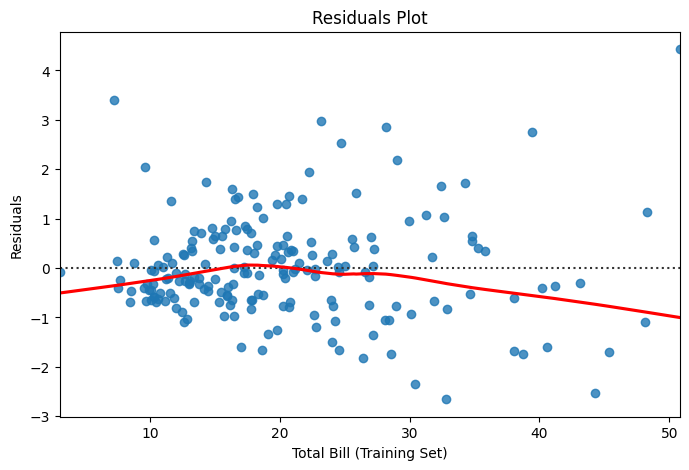

In [221]:
# Predictions from the Ridge model
predictions = ridge_reg.predict(x_train)
residuals = y_train - predictions

plt.figure(figsize=(8, 5))
sns.residplot(x=df.loc[x_train.index, 'total_bill'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Total Bill (Training Set)')
plt.ylabel('Residuals')
plt.show()


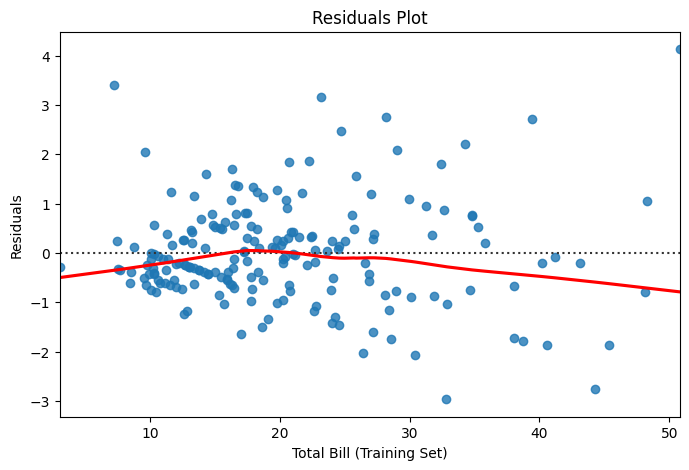

In [222]:
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(x_train, y_train)

# Predictions from the Lasso model
predictions = lasso_reg.predict(x_train)
residuals = y_train - predictions

plt.figure(figsize=(8, 5))
sns.residplot(x=df.loc[x_train.index, 'total_bill'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Total Bill (Training Set)')
plt.ylabel('Residuals')
plt.show()


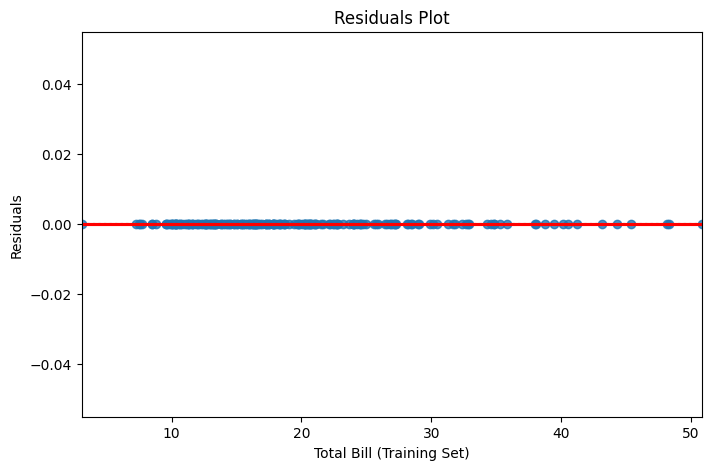

In [223]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train, y_train)

# Predictions from the Decision Tree model
predictions = tree_reg.predict(x_train)
residuals = y_train - predictions
plt.figure(figsize=(8, 5))
sns.residplot(x=df.loc[x_train.index, 'total_bill'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Total Bill (Training Set)')
plt.ylabel('Residuals')
plt.show()

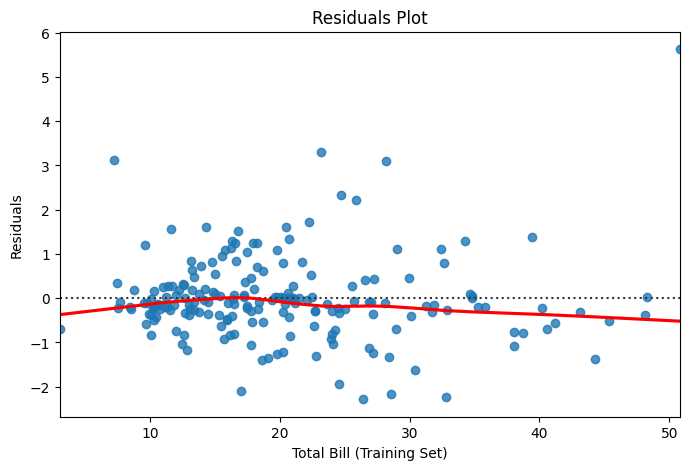

In [224]:
svr_reg = SVR(kernel='rbf') 
svr_reg.fit(x_train_scaled, y_train_scaled) 

# Predictions from the SVR model (on the training data)
predictions = svr_reg.predict(x_train_scaled)
predictions = sc_y.inverse_transform(predictions.reshape(-1, 1)).ravel()

residuals = y_train - predictions

plt.figure(figsize=(8, 5))
sns.residplot(x=df.loc[x_train.index, 'total_bill'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Total Bill (Training Set)')
plt.ylabel('Residuals')
plt.show()

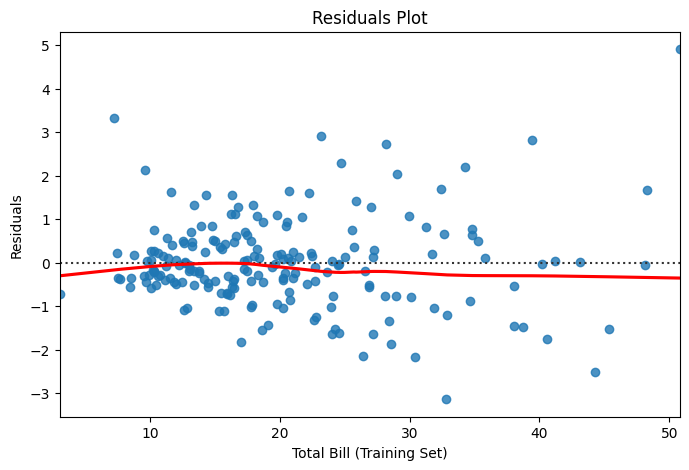

In [225]:
knn_reg = KNeighborsRegressor(n_neighbors=25)
knn_reg.fit(x_train, y_train)

# Predictions from the KNN model (on the training data)
predictions = knn_reg.predict(x_train)
residuals = y_train - predictions

plt.figure(figsize=(8, 5))
sns.residplot(x=df.loc[x_train.index, 'total_bill'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Total Bill (Training Set)')
plt.ylabel('Residuals')
plt.show()

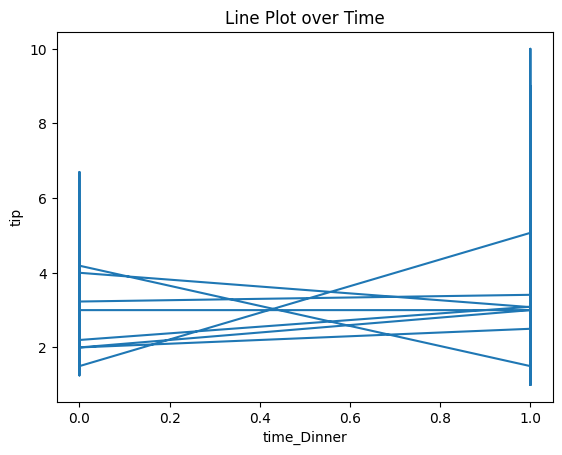

In [226]:
# Line plot 
plt.plot(df_new['time_Dinner'], df_new['tip'])
plt.title('Line Plot over Time')
plt.xlabel('time_Dinner')
plt.ylabel('tip')
plt.show()

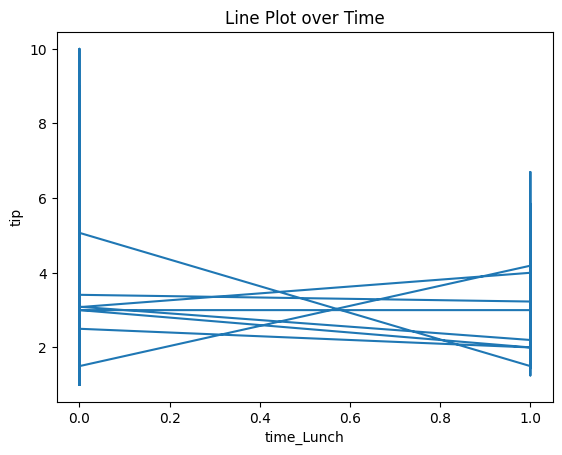

In [227]:
# Line plot 
plt.plot(df_new['time_Lunch'], df_new['tip'])
plt.title('Line Plot over Time')
plt.xlabel('time_Lunch')
plt.ylabel('tip')
plt.show()

In [228]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Prepare the data (e.g., 'total_bill' predicting 'tip')
X = df_new['total_bill']
y = df_new['tip']
X = sm.add_constant(X)  # Add constant for the intercept in the model

# Fit the regression model
model = sm.OLS(y, X).fit()

# Perform the Rainbow Test
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

# Interpretation
if rainbow_p_value > 0.05:
    print("The data does not show significant non-linearity. Linear regression may be appropriate.")
else:
    print("The data shows significant non-linearity. Consider a more complex model.")

Rainbow Test Statistic: 1.2291480226129026
Rainbow Test p-value: 0.12911921525513964
The data does not show significant non-linearity. Linear regression may be appropriate.
